In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# read the dataset
df = pd.read_csv('height-weight.csv')

In [8]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

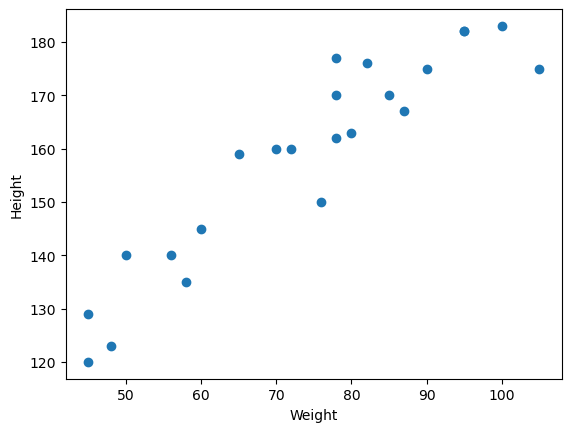

In [10]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [12]:
# Dependent and Independent features
X = df[['Weight']] #independent
y = df['Height'] #dependent

In [14]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [16]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [18]:
# Standardize the data training the independent data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

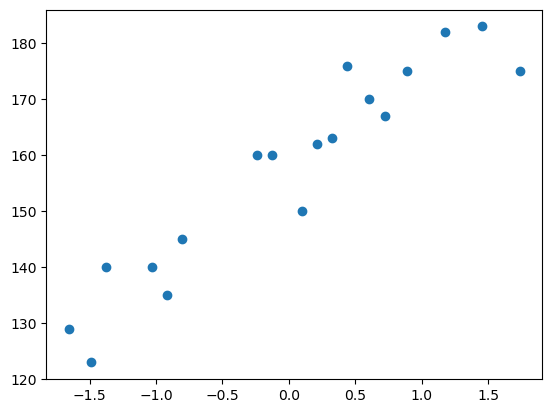

In [20]:
plt.scatter(X_train,y_train)

In [22]:
# Train the simple linear regression model
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [24]:
print("The coefficient of weight is",regression.coef_)
print("The intercept is ",regression.intercept_)

The coefficient of weight is [17.03440872]
The intercept is  157.5


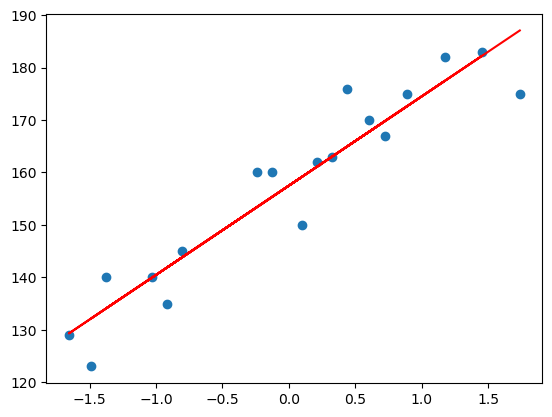

In [26]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),'r')

In [28]:
y_pred_test = regression.predict(X_test)
y_pred_test,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

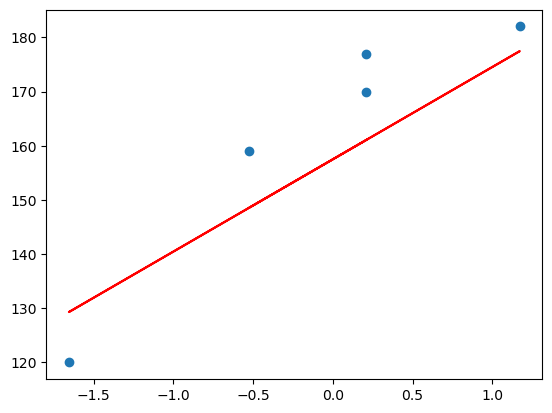

In [30]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regression.predict(X_test),'r')

## Performance Metrics
## MAE,MSE,RMSE
## R Squared Adjusted R squared

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051654
9.822657814519227
10.477400726827076


In [36]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test)
print(score)

0.7769869860423441


In [38]:
# Adjusted R squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231254

In [40]:
# new data point where weight is 80
scaled_weight = scaler.transform([[80]])
scaled_weight

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [42]:
print("height prediction: ",regression.predict([scaled_weight[0]]))

height prediction:  [163.01076266]


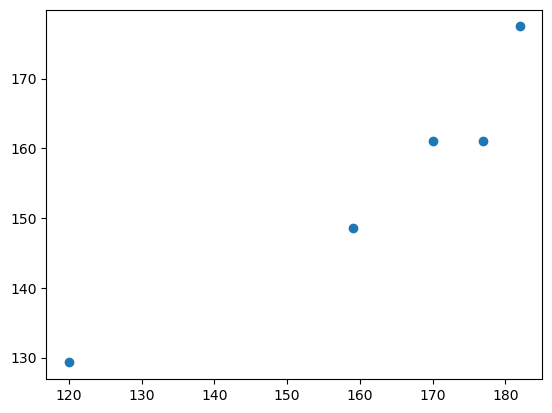

In [44]:
# Assumptions
# predict scatter plot for prediction
plt.scatter(y_test,y_pred_test)

In [46]:
# Residuals
residuals = y_test - y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1500x900 with 0 Axes>

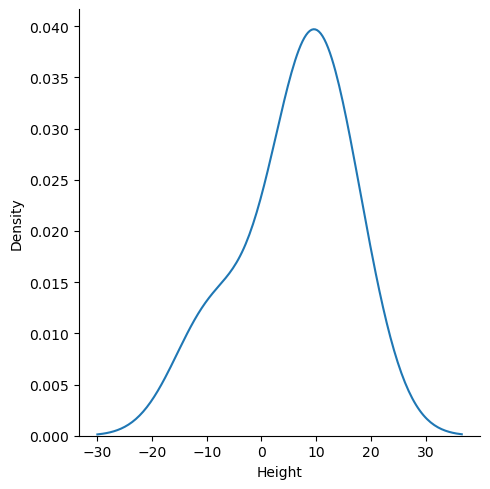

In [64]:
# Plotting the residuals
plt.figure(figsize=(15,9))
sns.displot(residuals,kind='kde')
plt.show()

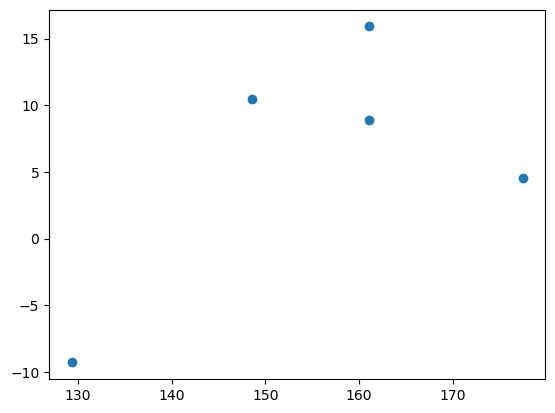

In [66]:
# Scatter plot with respect to residuals
# Uniform distribution
plt.scatter(y_pred_test,residuals)